# Tutkitaan ja esikäsitellään total_installed_price 

#### Sarakevalintoja

Koodilohkon avulla voidaan luoda erilaisia listoja sarakkeiden nimistä, jotka ovat kolmen (3) ryhmissä. 
Lista muodostetaan joko listaan "l" tai "m", mutta myös muut ovat sellaisenaan käytettävissä. 
Tämän tarkoitus on vähentää sarakkeiden nimien kirjoittamiseen tarvittavaa aikaa. 

Käytetty kohdassa "Tulostetaan rivejä, jotta voidaan etsiä sarakkeita, joista voisi löytyä yhteys"

In [1]:
azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']
tilt = ['tilt_1', 'tilt_2', 'tilt_3']
module_manufacturer = ['module_manufacturer_1', 'module_manufacturer_2', 'module_manufacturer_3']
module_model = ['module_model_1', 'module_model_2', 'module_model_3']
module_quantity = ['module_quantity_1', 'module_quantity_2', 'module_quantity_3']
technology_module = ['technology_module_1', 'technology_module_2', 'technology_module_3']
BIPV_module = ['BIPV_module_1', 'BIPV_module_2', 'BIPV_module_3']
bifacial_module = ['bifacial_module_1', 'bifacial_module_2', 'bifacial_module_3']
nameplate_capacity_module = ['nameplate_capacity_module_1', 'nameplate_capacity_module_2', 'nameplate_capacity_module_3']
efficiency_module = ['efficiency_module_1', 'efficiency_module_2', 'efficiency_module_3']
inverter_manufacturer = ['inverter_manufacturer_1', 'inverter_manufacturer_2', 'inverter_manufacturer_3']
inverter_model = ['inverter_model_1', 'inverter_model_2', 'inverter_model_3']
inverter_quantity = ['inverter_quantity_1', 'inverter_quantity_2', 'inverter_quantity_3']
micro_inverter = ['micro_inverter_1', 'micro_inverter_2', 'micro_inverter_3']
solar_storage_hybrid_inverter = ['solar_storage_hybrid_inverter_1', 'solar_storage_hybrid_inverter_2', 'solar_storage_hybrid_inverter_3']
built_in_meter_inverter = ['built_in_meter_inverter_1', 'built_in_meter_inverter_2', 'built_in_meter_inverter_3']
output_capacity_inverter = ['output_capacity_inverter_1', 'output_capacity_inverter_2', 'output_capacity_inverter_3']

end_1of3 = ['azimuth_1', 'tilt_1', 'module_manufacturer_1', 'module_model_1', 'module_quantity_1', 'technology_module_1', 
            'BIPV_module_1', 'bifacial_module_1', 'nameplate_capacity_module_1', 'efficiency_module_1', 
            'inverter_manufacturer_1', 'inverter_model_1', 'inverter_quantity_1', 'micro_inverter_1', 
            'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1', 'output_capacity_inverter_1']

end_2of3 = ['azimuth_2', 'tilt_2', 'module_manufacturer_2', 'module_model_2', 'module_quantity_2', 'technology_module_2', 
            'BIPV_module_2', 'bifacial_module_2', 'nameplate_capacity_module_2', 'efficiency_module_2', 
            'inverter_manufacturer_2', 'inverter_model_2', 'inverter_quantity_2', 'micro_inverter_2', 
            'solar_storage_hybrid_inverter_2', 'built_in_meter_inverter_2', 'output_capacity_inverter_2']

end_3of3 = ['azimuth_3', 'tilt_3', 'module_manufacturer_3', 'module_model_3', 'module_quantity_3', 'technology_module_3', 
            'BIPV_module_3', 'bifacial_module_3', 'nameplate_capacity_module_3', 'efficiency_module_3', 
            'inverter_manufacturer_3', 'inverter_model_3', 'inverter_quantity_3', 'micro_inverter_3', 
            'solar_storage_hybrid_inverter_3', 'built_in_meter_inverter_3', 'output_capacity_inverter_3']

# Mukana olevat sarakkeet poistetaan kohteessa
# Kommentoiduilla riveillä myös määritetään mitä ei poisteta m-listasta
l = []
l.extend(azimuth)
l.extend(tilt)
#l.extend(module_manufacturer)
#l.extend(module_model)
#l.extend(module_quantity)
#l.extend(technology_module)
#l.extend(BIPV_module)
#l.extend(bifacial_module)
#l.extend(nameplate_capacity_module)
l.extend(efficiency_module)
l.extend(inverter_manufacturer)
l.extend(inverter_model)
l.extend(inverter_quantity)
l.extend(micro_inverter)
l.extend(solar_storage_hybrid_inverter)
l.extend(built_in_meter_inverter)
l.extend(output_capacity_inverter)

m = []
#m.extend(end_1of3)
m.extend(end_2of3)
m.extend(end_3of3)

for i in l:
  #print(i)
  try:
    m.pop(m.index(i))
  except ValueError:
    continue

#print(m)
#print()
#print(l)

## Tehdään lohkoihin pohjalle DataFrame

Tämän työvaiheen alussa käytetään esikäsittelemätöntä dataa. Työvaiheeseen sisältyy datan tutkimista, joten monipuolisen tutkimisen helpottamiseksi luodaan koko datasta yksi DataFrame, josta voidaan ottaa kopio aina uuden koodilohkon alussa.

Tässä lohkossa tehdään myös muutama usein käytetty esikäsittely. Päiväys muutetaan parempaa tietotyyppiin ja määritetään kaksi uutta saraketta.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url ="../data/LBNL_file.csv"
df_all = pd.read_csv(url, low_memory=False, na_values = '-9999')
df_all['installation_date'] = pd.to_datetime(df_all['installation_date'], format='%d-%b-%Y %H:%M:%S') 
df_all['year'] = df_all['installation_date'].dt.year
df_all['price_per_kw'] = df_all['total_installed_price'] / df_all['system_size_DC']
df = df_all.copy()

### 'rebate_or_grant' esikäsittelyn yksi toimi ?

Ei oletettavaa vaikutusta hintaan `'total_installed_price'`. Huomattiin, että `np.count_nonzero` laskee myös nan-arvot.

**Ei merkittävä**

In [3]:
df['rebate_or_grant'] = df['rebate_or_grant'].replace(0, np.nan)

df.groupby('customer_segment').agg({'installation_date': ['count'], 'rebate_or_grant': ['count', np.count_nonzero, 'mean', 'min', 'max', 'sum', 'median']})

installation_date rebate_or_grant                \
                             count           count count_nonzero   
customer_segment                                                   
COM                          19693            2431         19693   
GOV                           3130             269          3130   
NON-PROFIT                    1546             489          1546   
NON-RES                         66              55            66   
RES                         974311          212325        974311   
SCHOOL                        1254              26          1254   

                                                                             
                           mean      min         max           sum   median  
customer_segment                                                             
COM                96747.427520    190.0  3813791.00  2.351930e+08   8333.0  
GOV               110574.693755   1240.0  4317390.00  2.974459e+07  24048.0  
NON-PROFIT         30690.915481    780.0  2257327.53  1.500786e+07  12989.0  
NON-RES           115490.444000   2735.0  1021632.00  6.351974e+06  47040.0  
RES                 4740.694490     13.0   649514.00  1.006568e+09   2203.0  
SCHOOL             75102.426923  12555.0   191276.80  1.952663e+06  41301.1

### Tulostetaan rivejä, jotta voidaan etsiä sarakkeita, joista voisi löytyä yhteys

Tutkitaan hieman dataa rivi riviltä. Tehdään muutamia suodatuksia ja yritetään löytää eri sarakkeista viitteitä, mikä voisi olla yhteydessä $0.1 hintamerkintöihin.

Koska tämän kaltainen tapa tutkia dataa on melko hidas ja epätarkka, siirrytään eteenpäin, kun ollaan huomattu, että hintamerkinnät saattavat johtua joistain tietyistä asentajista tai paneelin valmistajista.

In [4]:
df = df_all.copy()
df = df[(df['total_installed_price'] == .1)]
df = df[(df['year'] >= 2015)]
df['new_construction'] = df['new_construction'].replace(np.nan, 2)
df = df[(df['new_construction'] == 2)]
#'system_ID_1', 'system_ID_2',
d_cols = ['data_provider_1', 'data_provider_2', 'installation_date', 'customer_segment', 'new_construction', 'multiple_phase_system',
          'system_size_DC', 'utility_service_territory', 'third_party_owned','self_installed', 'DC_optimizer', 'inverter_loading_ratio', 'rebate_or_grant', 'state',
          'expansion_system', 'tracking', 'ground_mounted', 'zip_code', 'city']
d_cols.extend(l)
d_cols.extend(m)
df.drop(d_cols, axis=1, inplace=True)
df

system_ID_1 system_ID_2  total_installed_price   installer_name  \
32184   PGE-INT-115675851         NaN                    0.1  Hooked On Solar   
32761   PGE-INT-115736519         NaN                    0.1  Hooked On Solar   
34870   PGE-INT-114055516         NaN                    0.1  Hooked On Solar   
36329   PGE-INT-115655554         NaN                    0.1  Hooked On Solar   
50815   PGE-INT-116683464         NaN                    0.1  Hooked On Solar   
...                   ...         ...                    ...              ...   
959935  PGE-INT-113607745         NaN                    0.1  Hooked On Solar   
967728  PGE-INT-113608977         NaN                    0.1  Hooked On Solar   
969780  PGE-INT-113596925         NaN                    0.1  Hooked On Solar   
972832  PGE-INT-114054378         NaN                    0.1  Hooked On Solar   
975160  PGE-INT-113610351         NaN                    0.1  Hooked On Solar   

       module_manufacturer_1        module_model_1  module_quantity_1  \
32184               SunPower      SPR-X22-360-D-AC               29.0   
32761               SunPower      SPR-X22-360-D-AC               35.0   
34870               SunPower  SPR-X21-335-BLK-C-AC               32.0   
36329               SunPower      SPR-X22-360-D-AC               25.0   
50815               SunPower      SPR-X22-360-D-AC               15.0   
...                      ...                   ...                ...   
959935              SunPower  SPR-X21-335-BLK-C-AC               19.0   
967728              SunPower       SPR-327NE-WHT-D               28.0   
969780              SunPower  SPR-X21-335-BLK-C-AC               30.0   
972832              SunPower  SPR-X21-335-BLK-D-AC               23.0   
975160              SunPower  SPR-X21-335-BLK-C-AC               22.0   

        additional_modules technology_module_1  BIPV_module_1  \
32184                  0.0                Mono            0.0   
32761                  0.0                Mono            0.0   
34870                  0.0                Mono            0.0   
36329                  0.0                Mono            0.0   
50815                  0.0                Mono            0.0   
...                    ...                 ...            ...   
959935                 0.0                Mono            0.0   
967728                 0.0                Mono            0.0   
969780                 0.0                Mono            0.0   
972832                 0.0                Mono            0.0   
975160                 0.0                Mono            0.0   

        bifacial_module_1  nameplate_capacity_module_1  additional_inverters  \
32184                 0.0                        360.0                   0.0   
32761                 0.0                        360.0                   0.0   
34870                 0.0                        335.0                   1.0   
36329                 0.0                        360.0                   0.0   
50815                 0.0                        360.0                   0.0   
...                   ...                          ...                   ...   
959935                0.0                        335.0                   0.0   
967728                0.0                        327.0                   0.0   
969780                0.0                        335.0                   0.0   
972832                0.0                        335.0                   0.0   
975160                0.0                        335.0                   0.0   

        battery_rated_capacity_kW  battery_rated_capacity_kWh  year  \
32184                         NaN                         NaN  2019   
32761                         NaN                         NaN  2019   
34870                         NaN                         NaN  2017   
36329                         NaN                         NaN  2019   
50815                         NaN                         NaN  2019

### Tarkastelu yhden asentajan mukaan

Tulostus oletuksena pois näkyvistä (eli vika rivi #df). Tutkimustapa hidas.

In [5]:
df = df_all.copy()

df = df[(df['price_per_kw'] < 80)]
df = df[(df['year'] > 2014)]
#df = df[(df['installer_name'] == 'William Lyon Homes Usa')]
df = df[(df['installer_name'] == 'Highlands Diversified')]
#low_installer = df.groupby(['installer_name']).agg({'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max'], 'system_size_DC': ['size', 'count', 'min', 'median', 'mean', 'max']})
#low_installer = low_installer.sort_values(('total_installed_price', 'size'))
#df

## Peruslöydös 1

Jossain vaiheessa kokeilujen avulla havaittiin, että sarakkeen 'new_construction' arvon ollessa `NaN` 'total_installed_price' arvo saattaa olla epäilyttävä. Tälle ei ilmeisesti ole mitään suoraa loogista selitystä, mutta havainnon avulla nähdään realistisempi arvo asennuksen minimihinnalle, vaikka 'new_construction' arvoilla `0` ja `1` otokset jäävätkin huomattavan pieniksi verrattuna `NaN` arvon otokseen.

In [6]:
df = df_all.copy()
df['new_construction'] = df['new_construction'].replace(np.nan, 2)
#df['new_construction'] = df['new_construction'].replace(0, np.nan)
#df['new_construction'] = df['new_construction'].replace(1, np.nan)


df = df[(df['year'] > 2014)]
df.groupby(['new_construction']).agg({'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max'], 'price_per_kw': ['min', 'max']})

total_installed_price                             \
                                  size   count      min    median   
new_construction                                                    
0.0                               1981    1981  5977.80  26660.00   
1.0                              36904   36904  3726.00   9691.68   
2.0                             664621  598669     0.01  23552.00   

                                            price_per_kw                 
                          mean          max          min            max  
new_construction                                                         
0.0               33284.108667    823101.40  1327.201183    8197.255575  
1.0               13197.468451   1458758.00   966.670455  385914.814815  
2.0               33085.708996  61507191.42     0.000019  189393.939394

## Peruslöydös 2

Vähän parempi kuin peruslöydös 1. Huomataan myös, että `total_installed_price` tunnusluvut ovat samat, kun `new_construction` == 1 tai `data_provider_2` == "California Energy Commission".

Tämä on ehkä vähän loogisempi, sillä datan toimittaja tai kerääjä saattaa vaikuttaa siihen, miten dataa on kerätty, kirjattu ja validoitu.

In [7]:
df = df_all.copy()
df['data_provider_2'] = df['data_provider_2'].replace(np.nan, 2)


df = df[(df['year'] > 2014)]
df.groupby(['data_provider_2']).agg({'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max'], 'price_per_kw': ['min', 'max']})

total_installed_price                   \
                                                        size   count      min   
data_provider_2                                                                 
2                                                     659323  593371     0.01   
California Energy Commission                           36904   36904  3726.00   
California Public Utilities Commission                  7279    7279  5157.72   

                                                                              \
                                          median           mean          max   
data_provider_2                                                                
2                                       23664.00   31892.897448  20000000.00   
California Energy Commission             9691.68   13197.468451   1458758.00   
California Public Utilities Commission  18582.77  130375.558000  61507191.42   

                                       price_per_kw                 
                                                min            max  
data_provider_2                                                     
2                                          0.000019  189393.939394  
California Energy Commission             966.670455  385914.814815  
California Public Utilities Commission   818.594988  126355.214717

### Kerätään tähän kaikin tiedossa olevin kriteerein mahdollisimman suppea joukko epämääräisiä hintoja sisältävää dataa

Havainnot alla.

Tämän lohkon tarkoitus oli yhdistellä eri sarakkeiden tietoihin perustuen mahdollisimman suppea joukko rivejä, joissa olisi kaikki epämääräisen pienet hintatiedot, mutta tästäkin tutkintalinjasta siirryttiin eteenpäin. Havaintoja kuitenkin listattu alle.

In [8]:
df = df_all.copy()
# Ei rajata 'rebate_or_grant' arvoja pois, siksi seuraava rivi on kommentoitu pois
#df['rebate_or_grant'] = df['rebate_or_grant'].replace(np.nan, -1)
#df = df[(df['rebate_or_grant'] == 0)] # Vaikutus on melko pieni

#df['new_construction'] = df['new_construction'].replace(np.nan, 2)
#df['new_construction'] = df['new_construction'].replace(0, np.nan)
#df['new_construction'] = df['new_construction'].replace(1, np.nan)
#df = df[(df['new_construction'] == 2)]

#df['self_installed'] = df['self_installed'].replace(np.nan, 2)
#df = df[(df['self_installed'] != 2)]

#df['data_provider_1'] = df['data_provider_1'].replace(np.nan, 2)

#df['data_provider_2'] = df['data_provider_2'].replace(np.nan, 2)
#df = df[(df['data_provider_2'] == 'California Energy Commission')]
#df = df[(df['data_provider_2'] == 'California Public Utilities Commission')]
#df = df[(df['data_provider_2'] == 2)]
#df['data_provider_2'] = df['data_provider_2'].replace('California Public Utilities Commission', np.nan)

#df['third_party_owned'] = df['third_party_owned'].replace(np.nan, 2)

#df['expansion_system'] = df['expansion_system'].replace(np.nan, 2) # Ei yhtään nan-arvoa

#df['additional_modules'] = df['additional_modules'].replace(np.nan, 2) # Ei nan-arvoja vuosina 2015-2019

#df['additional_inverters'] = df['additional_inverters'].replace(np.nan, 2) # Ei nan-arvoja vuosina 2015-2019

#df['DC_optimizer'] = df['DC_optimizer'].replace(np.nan, 2)

df = df[(df['year'] > 2014)]
df.groupby(['year']).agg({'installation_date': ['count'], 'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max'], 'system_size_DC': ['size', 'count', 'min', 'median', 'mean', 'max']})
#low_installer = low_installer.sort_values(('total_installed_price', 'size'), ascending=False)
#low_installer.head(30)

installation_date total_installed_price                         \
                 count                  size   count   min   median   
year                                                                  
2015            150898                150898   87888  0.01  23409.0   
2016            154578                154578  152866  0.01  23161.0   
2017            119840                119840  119367  0.01  22656.0   
2018            130487                130487  130216  0.01  22579.2   
2019            147703                147703  147217  0.01  22440.0   

                                system_size_DC                            \
              mean          max           size   count     min    median   
year                                                                       
2015  30118.492059  61507191.42         150898  150865  0.0066  5.565000   
2016  31597.190778   9745428.00         154578  154484  0.0088  5.600000   
2017  34021.348965  16000000.00         119840  119800  0.0088  5.880000   
2018  33346.332171  20000000.00         130487  130429  0.0066  5.815469   
2019  30430.731278  17516822.00         147703  147416  0.0055  5.766200   

                             
           mean         max  
year                         
2015   7.927579   1186.6624  
2016   9.151768   4408.1630  
2017  10.759987  13305.6100  
2018   9.871777   4445.2800  
2019   8.654698   7586.5625

`total_installed_price` minimiarvo 0.01 esiintyy vuosina 2015-2019 vain, jos `new_construction` sarakkeen arvo on NaN (=-9999) ja `data_provider_1` on 'CA_CPUC' (joka lienee sama kuin `data_provider_2` sarakkeen 'California Public Utilities Commission').

Riippuvuuksia

- rebate_or_grant == 0 on ainut, jossa min epäillyttävä. Jos `NaN`, min ok; jos != 0, min ok.
- self_installed on 0 tai 1, min epäillyttävä. Jos `NaN`, min ok.
- data_provider_1 == 'CA_CPUC' on ainut, jossa min epäillyttävä.
- Jos data_provider_2 on `NaN`, min epäilyttävä.
- Onko system_ID merkki jostain? Vai liittyykö vain asentajaan? ...jos se on...
  - `PGE-INT-*`
  - `SCE-INT-NST-*`
- Näitä on epäilyttävillä min arvoilla
  - installer_name
    - `Hooked On Solar`
  - module_manufacturer_1
    - `SunPower`
- DC_optimizer on 0 tai 1, min epäillyttävä. Jos `NaN`, min ok.

Ei merkittävää riippuvuutta

- utility_service_territory. Kaikki epäillyttävät min arvot kolmen suuren joukossa, jotka kattavat suuren osan datasta.
- third_party_owned. 0 tai 1 -> min epäilyttävä. Jos `NaN`, hintatiedot puuttuu kokonaan vuosina 2015-2019.
- expansion_system. 0 tai 1 -> min epäilyttävä. `NaN` puuttuu kokonaan.
- additional_modules. 0 tai 1 -> min epäilyttävä. `NaN` puuttuu kokonaan vuosina 2015-2019.
- additional_inverters. 0 tai 1 -> min epäilyttävä. `NaN` puuttuu kokonaan vuosina 2015-2019.

### Kerätään tähän kaikin tiedossa olevin kriteerein mahdollisimman laaja joukko dataa, josta on siivottu epämääräiset pois

In [9]:
df = df_all.copy()
df = df[(df['rebate_or_grant'] != 0)]
#df['third_party_owned'] = df['third_party_owned'].replace(np.nan, 2)
#df['new_construction'] = df['new_construction'].replace(np.nan, 2)
#df['new_construction'] = df['new_construction'].replace(0, np.nan)
#df['new_construction'] = df['new_construction'].replace(1, np.nan)
#df['self_installed'] = df['self_installed'].replace(np.nan, 2)
#df['data_provider_2'] = df['data_provider_2'].replace(np.nan, 2)
#df['data_provider_2'] = df['data_provider_2'].replace('California Public Utilities Commission', np.nan)
#df = df[(df['utility_service_territory'] != 'Pacific Gas and Electric')]
#df = df[(df['utility_service_territory'] != 'San Diego Gas and Electric')]
#df = df[(df['price_per_kw'] > 72)]


df = df[(df['year'] > 2014)]
df.groupby(['new_construction']).agg({'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max']})

total_installed_price                                         \
                                  size  count     min    median          mean   
new_construction                                                                
0.0                               1971   1971  5977.8  26604.00  31369.574282   
1.0                              36904  36904  3726.0   9691.68  13197.468451   

                             
                        max  
new_construction             
0.0                823101.4  
1.0               1458758.0

## Tunnuslukuja 'price_per_kW':n rajauksella

Siirrytään tutkimaan asiaa hintatehosuhteen avulla. Jos asennuksen hinta on epämääräisen pieni, silloin todennäköisesti myös hintatehosuhde on pieni. Luku huomioi myös asennetun voimalan tehon, joten samalla löytyvät tehoon nähden liian halvat asennukset. Alla olevasta taulukosta nähdään, että lähempänä pienen asennuksen realistista hintaa olevat asennukset jäävät puolestaan hintatehosuhteeltaan epärealistisen pieniksi. Tästä johtuen lienee tarpeellista tutkia tarkemmin sitä, miten hintatehosuhteen arvot jakautuvat.

In [10]:
df = df_all.copy()
df = df[(df['price_per_kw'] < 80)]
df = df[(df['price_per_kw'] >= 0)]
df = df[(df['year'] > 2014)]
df.groupby(['year']).agg({'installation_date': ['count'],
                          'total_installed_price': ['size', 'count', 'min', 'median', 'mean', 'max'],
                          'system_size_DC': ['size', 'count', 'min', 'median', 'mean', 'max'],
                          'price_per_kw': ['min', 'max']})

installation_date total_installed_price                                 \
                 count                  size count   min median        mean   
year                                                                          
2015              2080                  2080  2080  0.01    1.0   23.757846   
2016              2428                  2428  2428  0.01    1.0   57.652846   
2017              1888                  1888  1888  0.01    1.0  108.561997   
2018              1292                  1292  1292  0.01    1.0   95.466912   
2019              1578                  1578  1578  0.01    1.0   34.588175   

               system_size_DC                                               \
           max           size count    min    median       mean        max   
year                                                                         
2015  16564.80           2080  2080  1.530  6.171429   7.733608   829.6000   
2016  49400.00           2428  2428  1.287  6.355469  13.970357  1469.0200   
2017  39600.93           1888  1888  0.550  7.287796  17.472076  1117.3500   
2018  40324.00           1292  1292  0.300  8.120000  18.612629  2267.0400   
2019  14432.40           1578  1578  1.300  6.662571  22.640978  7586.5625   

     price_per_kw             
              min        max  
year                          
2015     0.001205  78.937813  
2016     0.000019  79.045093  
2017     0.000297  78.620690  
2018     0.000028  77.549558  
2019     0.000725  70.135747

## Piirretään kuvaaja, jonka avulla voi arvioida epärealistisen hintatehosuhteen alarajaa

Aluksi otetaan käytännössä ainoaksi rajaukseksi vuodet 2015-2019, koska suurin osa etsinnässä olleista hinnoista sijoittuu kyseisille vuosille.

Piirretään kuvaaja kahdella eri tavalla. Ensimmäisenä esitetään jakauma palkkeina, joiden korkeus kuvaa asennusten määrää ryhmiteltynä hintatehosuhteen mukaan. Toisen tyyppisessä kuvaajassa jakauma piirretään jatkuvana käyränä, joka ei näytä asennusten määriä. Tässä sen tarkoitus on vain antaa selkeämpi kokonaiskuva jakaumasta samalla, kun ensimmäinen kolmeen asteikkoon jaettu kuvaajan tarkoitus on antaa tarkempi kuva jakauman hännistä.

In [11]:
# FormatterFunc
def no_mult(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.0f}'.format(x)

def kilo(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.1f}k'.format(x*1e-3)

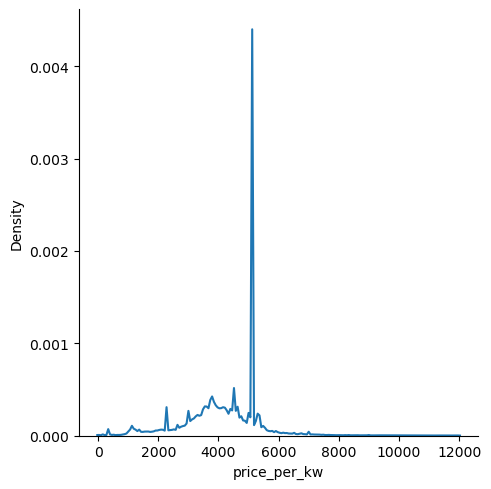

In [12]:
df = df_all.copy()
df = df[(df['year'] > 2014)] # Rajataan tarkasteluväli vuosissa

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 100
max_1 = 2000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 6000
max_3 = 12000

# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
# Erillinen kde displot
df_kde = df_3.copy()
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]


# Piirto
fig, axs = plt.subplots(1, 3, layout="constrained", figsize=(18,6))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[2], binwidth=binwidth)
for i in range(len(axs)):
  axs[i].set_xlabel('Price per kW [$/kW]')
  axs[i].set_ylabel('Asennusten määrä')
axs[0].xaxis.set_major_formatter(no_mult)
axs[1].xaxis.set_major_formatter(no_mult)
axs[2].xaxis.set_major_formatter(kilo)

fig.suptitle('Hintatehosuhteen arvojen jakauma vuosilta 2015-2019')
plt.show()

# df_kde kopioitu df_3
sns.displot(data=df_kde, x='price_per_kw', kind="kde", bw_adjust=.1)
plt.show()

Vertailun vuoksi piirretään vastaavat kuvaajat vuosille 1998-2014.

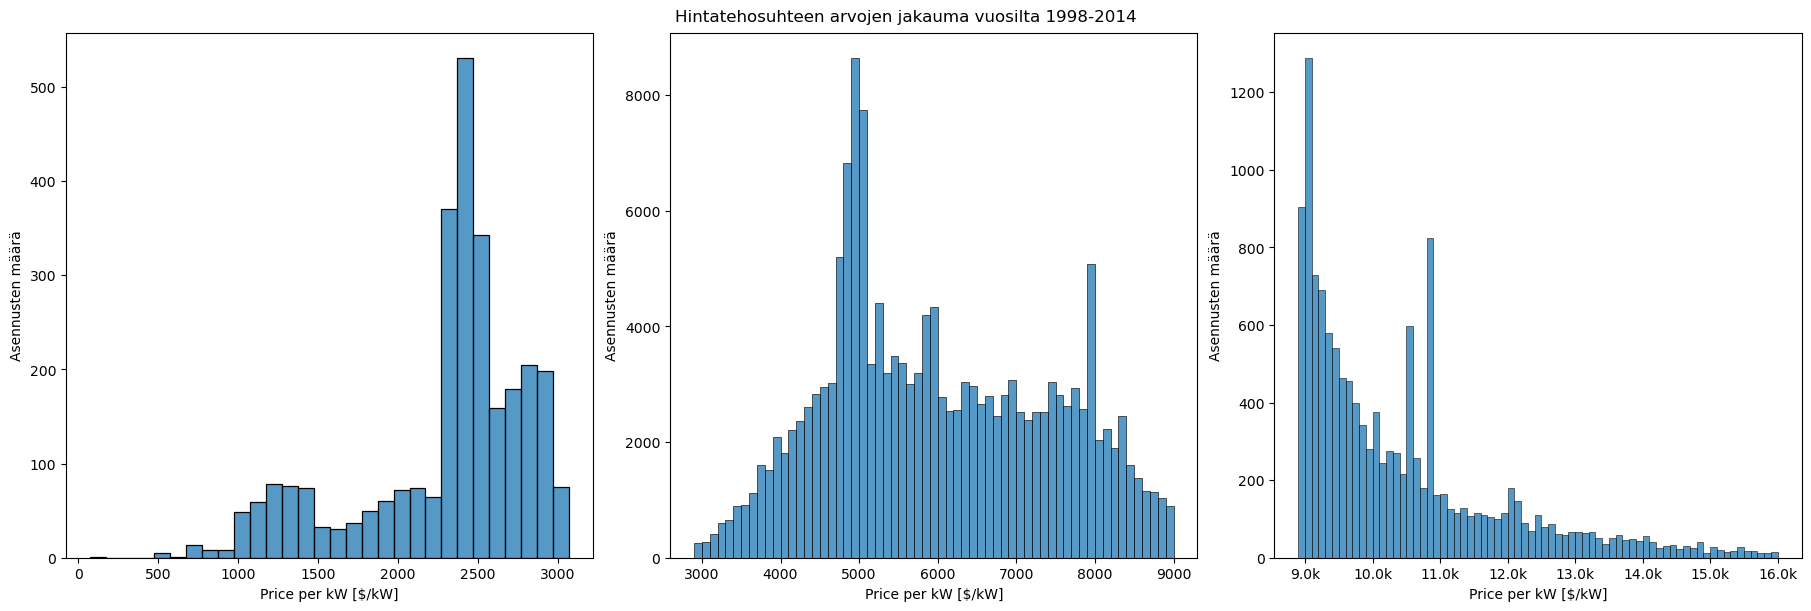

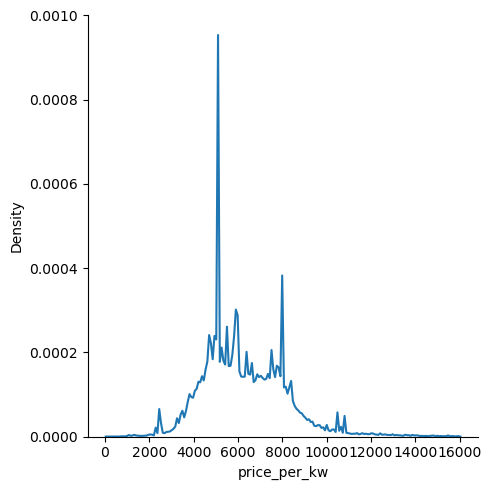

In [13]:
df = df_all.copy()
df = df[(df['year'] <= 2014)] # Rajataan tarkasteluväli vuosissa

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 100
max_1 = 3000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 9000
max_3 = 16000

# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
# Erillinen kde displot
df_kde = df_3.copy()
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]

#Piirto
fig, axs = plt.subplots(1, 3, layout="constrained", figsize=(18,6))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[2], binwidth=binwidth)
for i in range(len(axs)):
  axs[i].set_xlabel('Price per kW [$/kW]')
  axs[i].set_ylabel('Asennusten määrä')
axs[0].xaxis.set_major_formatter(no_mult)
axs[1].xaxis.set_major_formatter(no_mult)
axs[2].xaxis.set_major_formatter(kilo)

fig.suptitle('Hintatehosuhteen arvojen jakauma vuosilta 1998-2014')
plt.show()

sns.displot(data=df_kde, x='price_per_kw', kind="kde", bw_adjust=.08)
plt.show()

### 'Price per kW' jakaumia valituille asentajille

Otetaan esimerkki lähestymistavasta, jossa valitaan piirtää jakauma vain tiettyjen asentajien asennuksista. Jos tähän keräisi hyvän otoksen asentajia, tuloksetkin voisivat olla hyödyllisiä. Tällä kertaa voidaan todeta, että käytännöllisempi tapa tehdä kohtuullinen vääristyneiden hintojen karsinta on tehdä se asettamalla sopiva hintatehosuhteen alaraja.

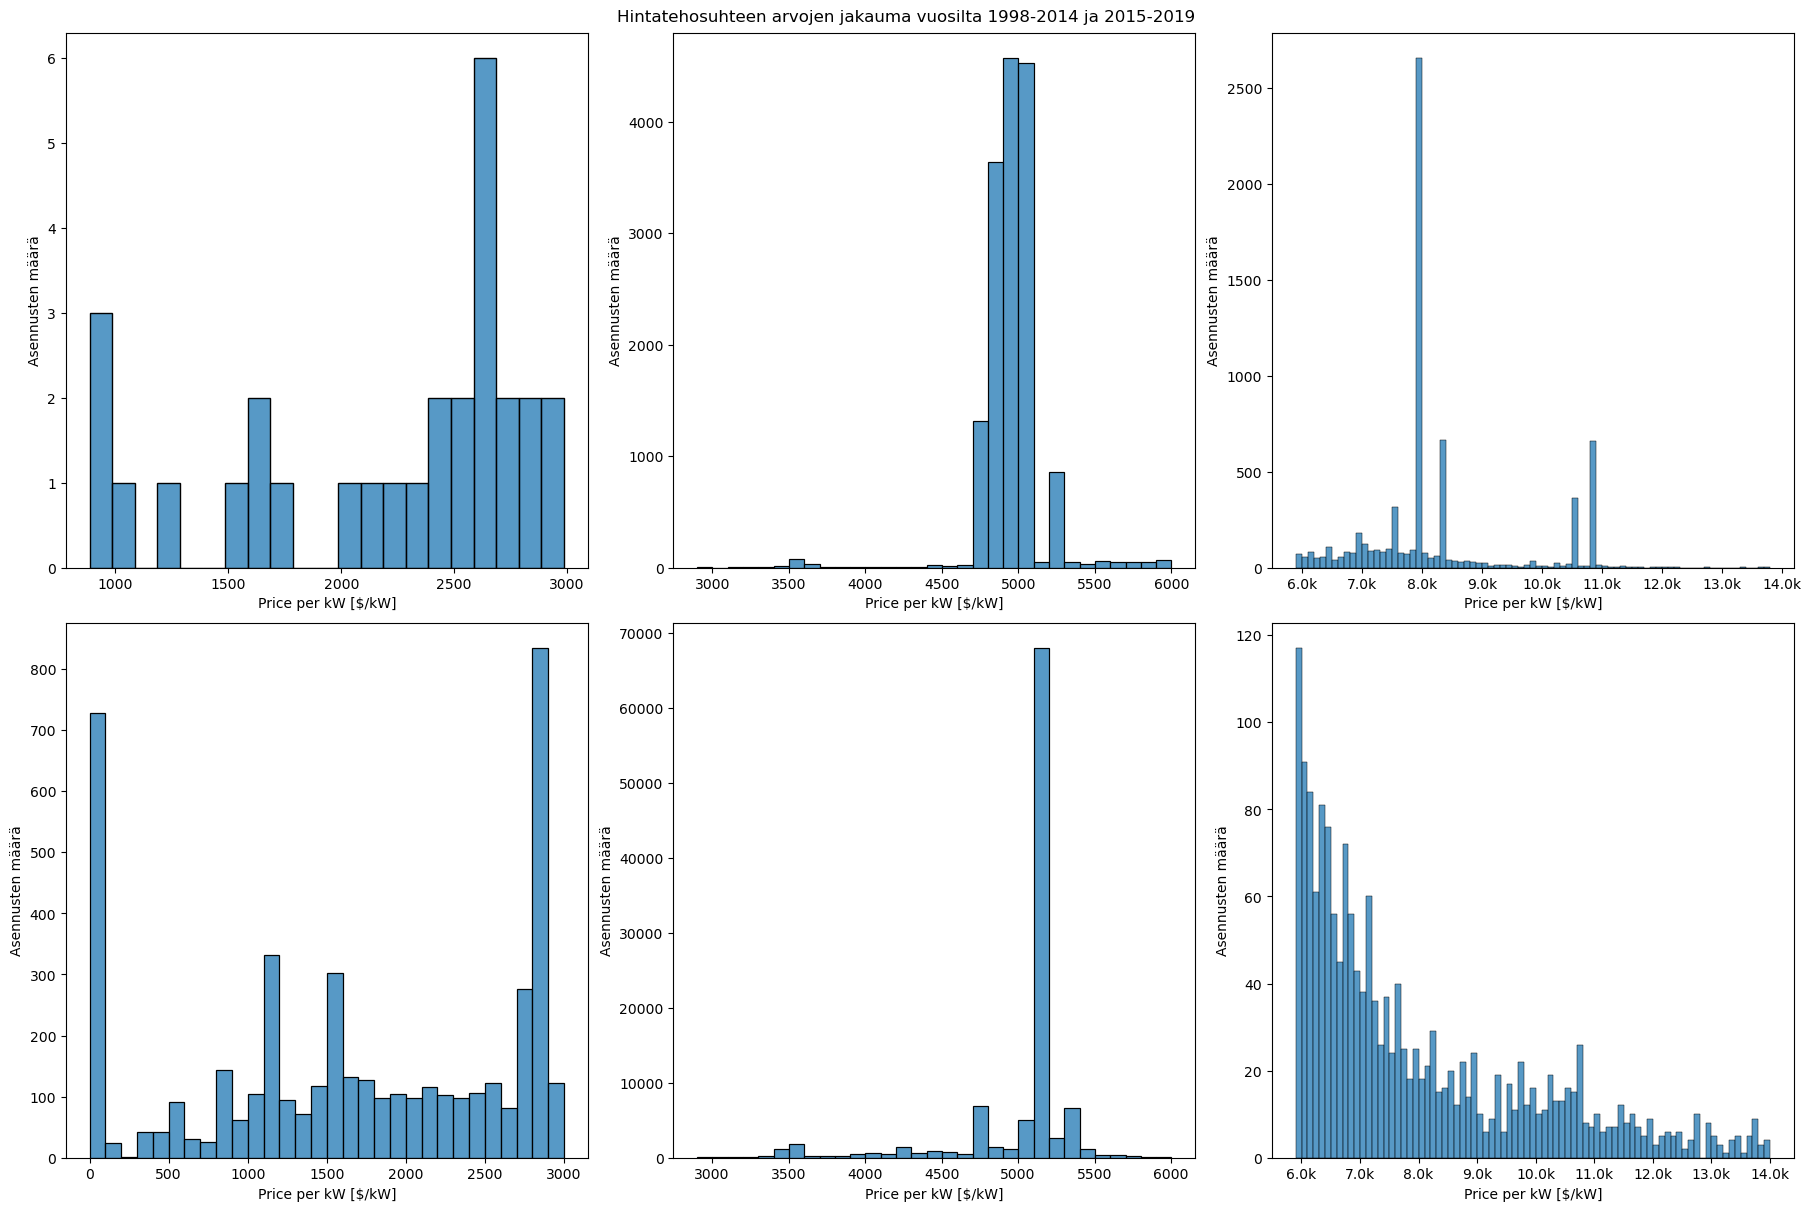

In [24]:
df = df_all.copy()
installers = ['Hooked On Solar', 'William Lyon Homes Usa', 'Tesla Energy'] #
df = df[(df['installer_name'].isin(installers))] # Poimitaan asentaja
df = df[(df['year'] <= 2014)] # Rajataan tarkasteluväli vuosissa

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 100
max_1 = 3000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 6000
max_3 = 14000

# Yläriviin
# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]

df = df_all.copy()
df = df[(df['installer_name'].isin(installers))] # Poimitaan asentaja
df = df[(df['year'] > 2014)] # Rajataan tarkasteluväli vuosissa

# Alariviin
# Datan rajaus eri kuviin
df_4 = df[(df['price_per_kw'] < max_1)]

df_5 = df[(df['price_per_kw'] < max_2)]
df_5 = df_5[(df_5['price_per_kw'] >= (max_1 - binwidth))]

df_6 = df[(df['price_per_kw'] < max_3)]
df_6 = df_6[(df_6['price_per_kw'] >= (max_2 - binwidth))]

# Piirto
fig_rows = 2
fig_cols = 3
fig, axs = plt.subplots(fig_rows, fig_cols, layout="constrained", figsize=((fig_cols*6),(fig_rows*6)))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0, 0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[0, 1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[0, 2], binwidth=binwidth)
sns.histplot(data=df_4, x='price_per_kw', ax=axs[1, 0], binwidth=binwidth)
sns.histplot(data=df_5, x='price_per_kw', ax=axs[1, 1], binwidth=binwidth)
sns.histplot(data=df_6, x='price_per_kw', ax=axs[1, 2], binwidth=binwidth)
for i in range(fig_rows):
  for j in range(fig_cols):
    axs[i, j].set_xlabel('Price per kW [$/kW]')
    axs[i, j].set_ylabel('Asennusten määrä')
  axs[i, 0].xaxis.set_major_formatter(no_mult)
  axs[i, 1].xaxis.set_major_formatter(no_mult)
  axs[i, 2].xaxis.set_major_formatter(kilo)

fig.suptitle('Hintatehosuhteen arvojen jakauma vuosilta 1998-2014 ja 2015-2019')
plt.show()

### Kuvaajasta

Huomataan, että pylväät eivät asetu täysin määritellylle välille.

**Selitys:** Esim. vasemmalla ylhäällä olevassa kuvaajassa pienin `price per kW` arvo ei ole lähelläkään nollaa, jolloin pylväät eivät kata aluetta tasan alkaen alarajasta, vaan ensimmäisestä `price per kW` arvosta. Siksi viimeinenkin pylväs osuu eri alueelle ja ei siten enää vastaa seuraavan kuvaajan ensimmäistä pylvästä.

Tästä syystä on varmempaa käyttää alustavaan tarkasteluun alla olevaa piirtotapaa.

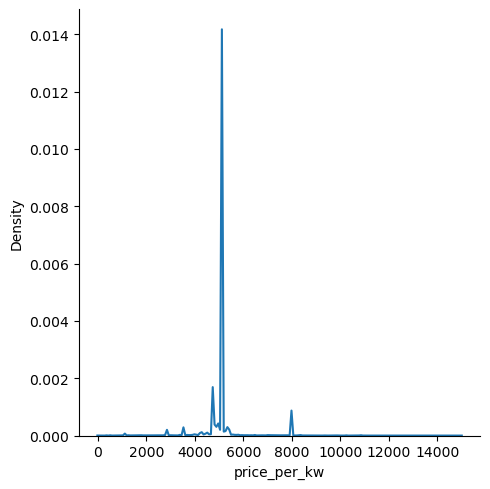

In [25]:
df = df_all.copy()
#df = df[(df['year'] <= 2014)] # Rajataan tarkasteluväli vuosissa
df = df[(df['price_per_kw'] < 15000)]
df = df[(df['installer_name'].isin(installers))] # Poimitaan asentaja

sns.displot(data=df, x='price_per_kw', kind="kde", bw_adjust=.08)
plt.show()

## Piirretään kuvaaja ja käytetään enemmän datan suodatusta

Palataan hieman taaksepäin ja otetaan seuraaviin kuvaajiin pohjaksi tämän notebookin ensimmäiset kuvaajat. Suodatetaan sitten hintaan vaikuttavaa dataa pois ja vertaillaan niiden vaikutuksia.

In [16]:
df = df_all.copy()
#df = df[(df['year'] > 2014)] # Rajataan tarkasteluväli vuosissa
df = df[(df['self_installed'] == 0)]
df = df[(df['third_party_owned'] == 0)]

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 50
max_1 = 2000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 8000
max_3 = 16000

# Ylärivi
# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
count_1 = df_3['price_per_kw'].count()
# Erillinen kde displot
df_kde = df_3.copy()
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]

# Alarivi
df = df_all.copy()
# Datan rajaus eri kuviin
df_4 = df[(df['price_per_kw'] < max_1)]

df_5 = df[(df['price_per_kw'] < max_2)]
df_5 = df_5[(df_5['price_per_kw'] >= (max_1 - binwidth))]

df_6 = df[(df['price_per_kw'] < max_3)]
count_2 = df_6['price_per_kw'].count()
# Erillinen kde displot
#df_kde = df_3.copy()
df_6 = df_6[(df_6['price_per_kw'] >= (max_2 - binwidth))]

# Piirto
size_mult = 6
fig_rows = 2
fig_cols = 3
fig, axs = plt.subplots(fig_rows, fig_cols, layout="constrained", figsize=((fig_cols*size_mult),(fig_rows*size_mult)))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0, 0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[0, 1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[0, 2], binwidth=binwidth)
sns.histplot(data=df_4, x='price_per_kw', ax=axs[1, 0], binwidth=binwidth)
sns.histplot(data=df_5, x='price_per_kw', ax=axs[1, 1], binwidth=binwidth)
sns.histplot(data=df_6, x='price_per_kw', ax=axs[1, 2], binwidth=binwidth)
for i in range(fig_rows):
  for j in range(fig_cols):
    axs[i, j].set_xlabel('Price per kW [$/kW]')
    axs[i, j].set_ylabel('Asennusten määrä')
  axs[i, 0].xaxis.set_major_formatter(no_mult)
  axs[i, 1].xaxis.set_major_formatter(no_mult)
  axs[i, 2].xaxis.set_major_formatter(kilo)

title = f'''Hintatehosuhteen arvojen jakauma vuosilta 1998-2019
Ylärivi: suodatettu (n = {str(count_1)})
Alarivi: suodattamaton (n = {str(count_2)})'''

fig.suptitle(title)
plt.show()

# df_kde kopioitu df_3 tai df_6
#sns.displot(data=df_kde, x='price_per_kw', kind="kde", bw_adjust=.1)
#plt.show()

Tärkeimpänä havaintona näistä kuvaajista voidaan sanoa, että valituilla suodatuksilla ei voida ratkaista epämääräisten hintojen ongelmaa.

### Muutamia jakauskuvaajia joissa jokin määrätty ehto täyttyy

Piirretään mahdollisten havaintojen toivossa kuvaajat näistäkin:

- self_installed == 1
- third_party_owned == 1
- Systeemissä on akku

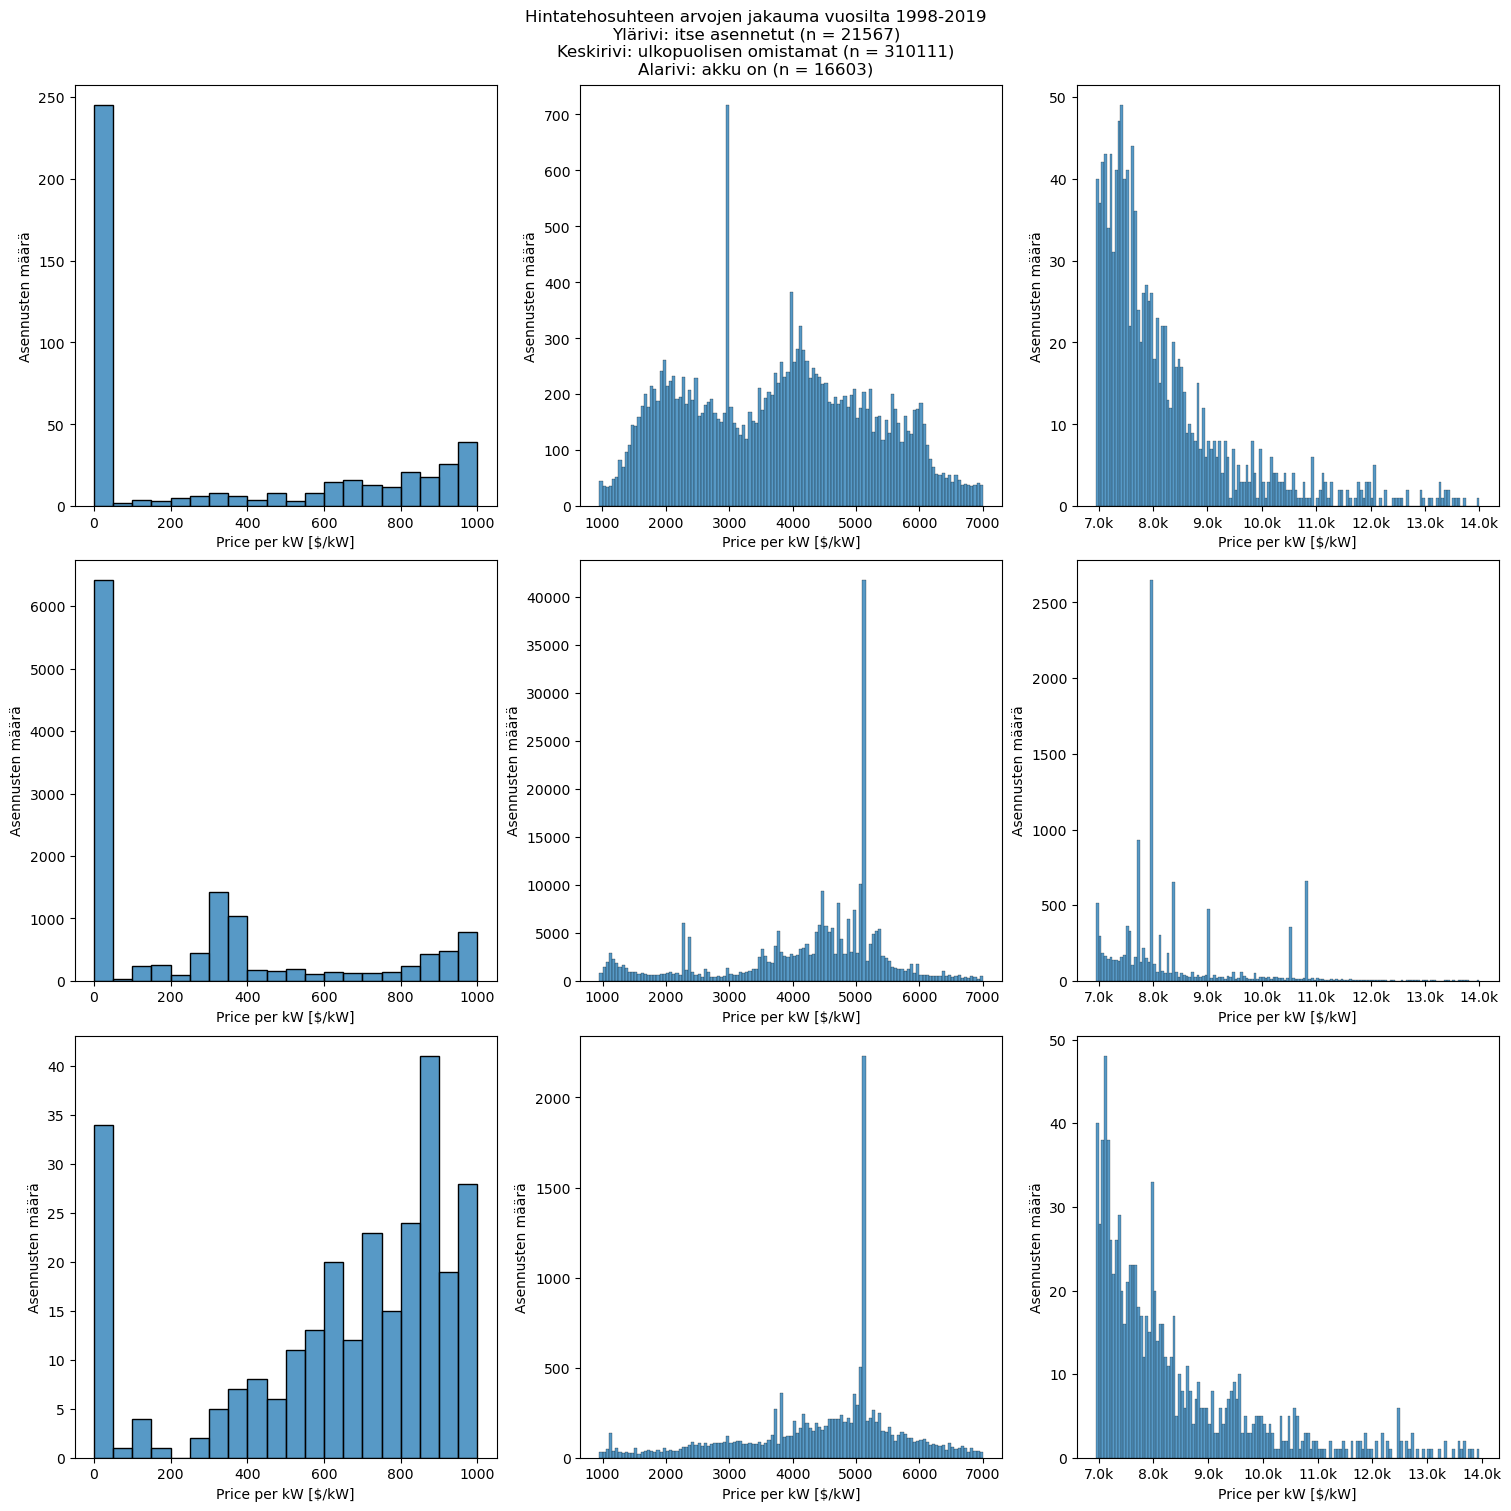

In [17]:
df = df_all.copy()
df = df[(df['self_installed'] == 1)]

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 50
max_1 = 1000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 7000
max_3 = 14000

# Ylärivi
# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
count_1 = df_3['price_per_kw'].count()
# Erillinen kde displot
df_kde = df_3.copy()
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]

# Keskirivi
df = df_all.copy()
df = df[(df['third_party_owned'] == 1)]
# Datan rajaus eri kuviin
df_4 = df[(df['price_per_kw'] < max_1)]

df_5 = df[(df['price_per_kw'] < max_2)]
df_5 = df_5[(df_5['price_per_kw'] >= (max_1 - binwidth))]

df_6 = df[(df['price_per_kw'] < max_3)]
count_2 = df_6['price_per_kw'].count()
# Erillinen kde displot
#df_kde = df_3.copy()
df_6 = df_6[(df_6['price_per_kw'] >= (max_2 - binwidth))]

# Alarivi
df = df_all.copy()
df_bat_1 = df[(df['solar_storage_hybrid_inverter_1'] == 1)]
df_bat_2 = df[(df['solar_storage_hybrid_inverter_2'] == 1)]
df_bat_3 = df[(df['solar_storage_hybrid_inverter_3'] == 1)]
df['battery_rated_capacity_kW'] = df['battery_rated_capacity_kW'].notna()
df_bat_4 = df[(df['battery_rated_capacity_kW'] == True)]
df['battery_rated_capacity_kWh'] = df['battery_rated_capacity_kWh'].notna()
df_bat_5 = df[(df['battery_rated_capacity_kWh'] == True)]

df = pd.concat([df_bat_1, df_bat_2, df_bat_3, df_bat_4, df_bat_5])
df_i = df.index
df['index_col'] = df_i
df.drop_duplicates(subset=['index_col'], inplace=True)

# Datan rajaus eri kuviin
df_7 = df[(df['price_per_kw'] < max_1)]

df_8 = df[(df['price_per_kw'] < max_2)]
df_8 = df_8[(df_8['price_per_kw'] >= (max_1 - binwidth))]

df_9 = df[(df['price_per_kw'] < max_3)]
count_3 = df_9['price_per_kw'].count()
# Erillinen kde displot
#df_kde = df_3.copy()
df_9 = df_9[(df_9['price_per_kw'] >= (max_2 - binwidth))]

# Piirto
size_mult = 5
fig_rows = 3
fig_cols = 3
fig, axs = plt.subplots(fig_rows, fig_cols, layout="constrained", figsize=((fig_cols*size_mult),(fig_rows*size_mult)))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0, 0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[0, 1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[0, 2], binwidth=binwidth)
sns.histplot(data=df_4, x='price_per_kw', ax=axs[1, 0], binwidth=binwidth)
sns.histplot(data=df_5, x='price_per_kw', ax=axs[1, 1], binwidth=binwidth)
sns.histplot(data=df_6, x='price_per_kw', ax=axs[1, 2], binwidth=binwidth)
sns.histplot(data=df_7, x='price_per_kw', ax=axs[2, 0], binwidth=binwidth)
sns.histplot(data=df_8, x='price_per_kw', ax=axs[2, 1], binwidth=binwidth)
sns.histplot(data=df_9, x='price_per_kw', ax=axs[2, 2], binwidth=binwidth)
for i in range(fig_rows):
  for j in range(fig_cols):
    axs[i, j].set_xlabel('Price per kW [$/kW]')
    axs[i, j].set_ylabel('Asennusten määrä')
  axs[i, 0].xaxis.set_major_formatter(no_mult)
  axs[i, 1].xaxis.set_major_formatter(no_mult)
  axs[i, 2].xaxis.set_major_formatter(kilo)

title = f'''Hintatehosuhteen arvojen jakauma vuosilta 1998-2019
Ylärivi: itse asennetut (n = {str(count_1)})
Keskirivi: ulkopuolisen omistamat (n = {str(count_2)})
Alarivi: akku on (n = {str(count_3)})'''

fig.suptitle(title)
plt.show()

# df_kde kopioitu df_3 tai df_6
#sns.displot(data=df_kde, x='price_per_kw', kind="kde", bw_adjust=.1)
#plt.show()

Todetaan, että asennuksen tekeminen itse todella alentaa kuluja. Ulkopuolisen omistamissa voimaloissa on selvä piikki, mikä saattaa viitata tilastoinnin epämääräisyyteen.

## Myös akut suodatettu pois

Piirretään hintajakauma järjestelmille, joista on suodatettu TPO, self_installed ja akut.

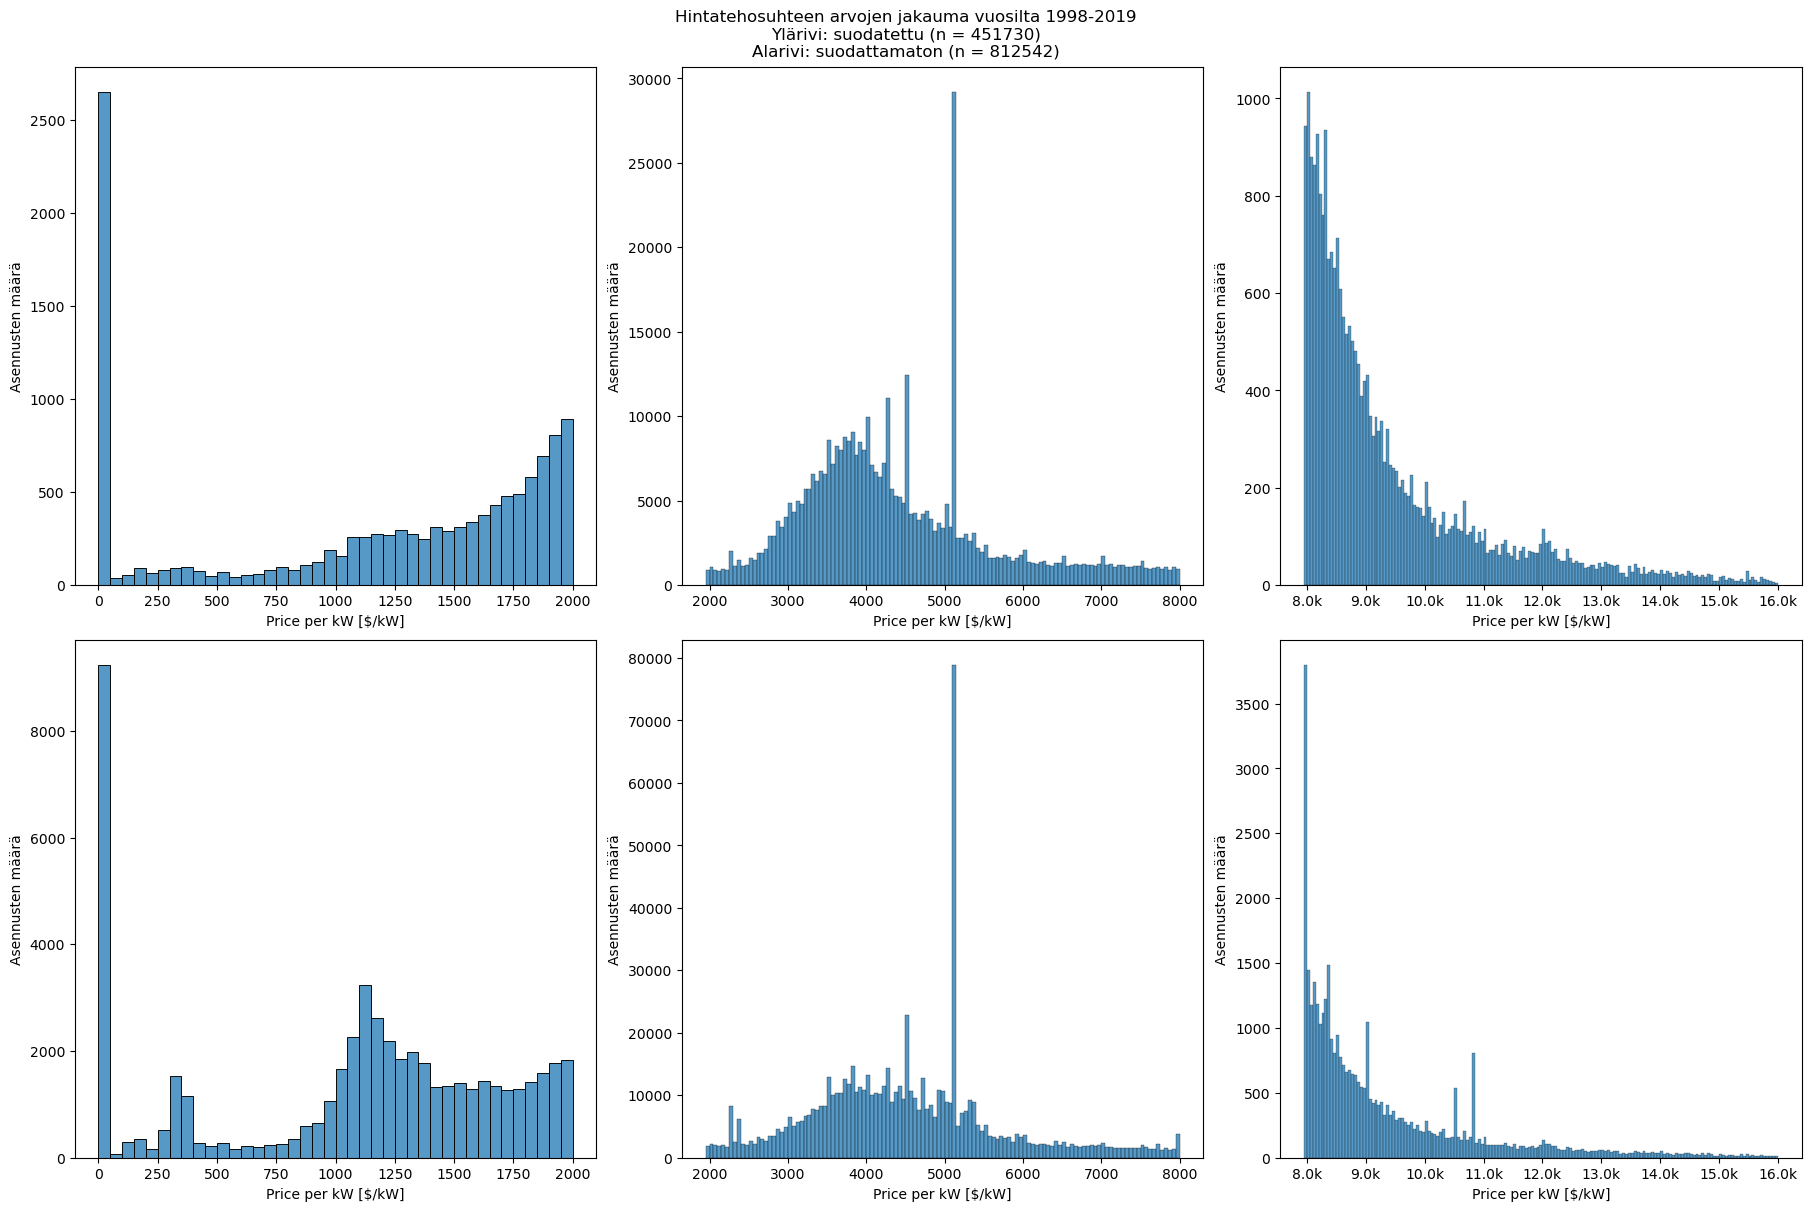

In [18]:
df_ready = df_all.copy()
# Akkusuodatus (kuten vikassa lohkossa)
df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_1'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_2'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_3'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df['battery_rated_capacity_kW'] = df['battery_rated_capacity_kW'].notna()
df = df[(df['battery_rated_capacity_kW'] == True)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df['battery_rated_capacity_kWh'] = df['battery_rated_capacity_kWh'].notna()
df = df[(df['battery_rated_capacity_kWh'] == True)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df_ready['total_installed_price'] = df_ready['total_installed_price'].replace(0, np.nan)

# Muut
df_ready = df_ready[(df_ready['self_installed'] == 0)]
df_ready = df_ready[(df_ready['third_party_owned'] == 0)]

df_ready['price_per_kw'] = df_ready['total_installed_price'] / df_ready['system_size_DC']

# Säästetään muokkausta, koska koodi copy-pastettu
df = df_ready

# Kun binwidth (histplot() -parametri) on vakio, vertailu kuvien välillä on helpompaa
# Sisällytetään myös edellisen kuvan viimeinen palkki 2. ja 3. kuvaan kun rajataan kuvien dataa
binwidth = 50
max_1 = 2000 # Ensimmäisen kuvan raja hintatehosuhteen arvolle
max_2 = 8000
max_3 = 16000

# Ylärivi
# Datan rajaus eri kuviin
df_1 = df[(df['price_per_kw'] < max_1)]

df_2 = df[(df['price_per_kw'] < max_2)]
df_2 = df_2[(df_2['price_per_kw'] >= (max_1 - binwidth))]

df_3 = df[(df['price_per_kw'] < max_3)]
count_1 = df_3['price_per_kw'].count()
# Erillinen kde displot
#df_kde = df_3.copy()
df_3 = df_3[(df_3['price_per_kw'] >= (max_2 - binwidth))]

# Alarivi
df = df_all.copy()
# Datan rajaus eri kuviin
df_4 = df[(df['price_per_kw'] < max_1)]

df_5 = df[(df['price_per_kw'] < max_2)]
df_5 = df_5[(df_5['price_per_kw'] >= (max_1 - binwidth))]

df_6 = df[(df['price_per_kw'] < max_3)]
count_2 = df_6['price_per_kw'].count()
# Erillinen kde displot
#df_kde = df_3.copy()
df_6 = df_6[(df_6['price_per_kw'] >= (max_2 - binwidth))]

# Piirto
size_mult = 6
fig_rows = 2
fig_cols = 3
fig, axs = plt.subplots(fig_rows, fig_cols, layout="constrained", figsize=((fig_cols*size_mult),(fig_rows*size_mult)))

sns.histplot(data=df_1, x='price_per_kw', ax=axs[0, 0], binwidth=binwidth)
sns.histplot(data=df_2, x='price_per_kw', ax=axs[0, 1], binwidth=binwidth)
sns.histplot(data=df_3, x='price_per_kw', ax=axs[0, 2], binwidth=binwidth)
sns.histplot(data=df_4, x='price_per_kw', ax=axs[1, 0], binwidth=binwidth)
sns.histplot(data=df_5, x='price_per_kw', ax=axs[1, 1], binwidth=binwidth)
sns.histplot(data=df_6, x='price_per_kw', ax=axs[1, 2], binwidth=binwidth)
for i in range(fig_rows):
  for j in range(fig_cols):
    axs[i, j].set_xlabel('Price per kW [$/kW]')
    axs[i, j].set_ylabel('Asennusten määrä')
  axs[i, 0].xaxis.set_major_formatter(no_mult)
  axs[i, 1].xaxis.set_major_formatter(no_mult)
  axs[i, 2].xaxis.set_major_formatter(kilo)

title = f'''Hintatehosuhteen arvojen jakauma vuosilta 1998-2019
Ylärivi: suodatettu (n = {str(count_1)})
Alarivi: suodattamaton (n = {str(count_2)})'''

fig.suptitle(title)
plt.show()

# df_kde kopioitu df_3 tai df_6
#sns.displot(data=df_kde, x='price_per_kw', kind="kde", bw_adjust=.1)
#plt.show()

## Luodaan alustava esikäsittelijä

Yritetään kirjoittaa hinnan esikäsittelijä, joka korvaa määrätyt hinnat arvolla `np.nan`.

In [19]:
# df edustaa muokattavaa DataFrame, jota ei tarvita esikäsittelyn jälkeen
df = df_all.copy()
print("Alku:", df['total_installed_price'].count())
# df_ready tulee sisältämään esikäsitellyn version
df_ready = df_all.copy()

# Suodatus nro 1
df = df[(df['price_per_kw'] < 1000)]
print("Poiston määrä, price_per_kw:", df['total_installed_price'].count())
# Laitetaan nolla, koska df.update() ei päivitä nan-arvoja
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

# Suodatus nro 2
df = df_all.copy()
df = df[(df['third_party_owned'] != 0)]
print("Poiston määrä, third_party_owned:", df['total_installed_price'].count())
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

# Suodatus nro 3
df = df_all.copy()
df = df[(df['self_installed'] != 0)]
print("Poiston määrä, self_installed:", df['total_installed_price'].count())
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

# Suodatus nro 4
df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_1'] == 1)]
count_hyb = len(df)
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_2'] == 1)]
count_hyb += len(df)
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_3'] == 1)]
count_hyb += len(df)
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])
print("Poiston määrä, storage_inverter:", count_hyb)

# Suodatus nro 5
df = df_all.copy()
df['battery_rated_capacity_kW'] = df['battery_rated_capacity_kW'].notna()
df = df[(df['battery_rated_capacity_kW'] == True)]
count_bat = len(df)
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df['battery_rated_capacity_kWh'] = df['battery_rated_capacity_kWh'].notna()
df = df[(df['battery_rated_capacity_kWh'] == True)]
count_bat += len(df)
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])
print("Poiston määrä, battery:", count_bat)

# Lopuksi poistetaan nollat, korvaus np.nan
df_ready['total_installed_price'] = df_ready['total_installed_price'].replace(0, np.nan)
print("nan korvauksen jälkeen:", df_ready['total_installed_price'].count())
print("Käsitellyn df:n rivien määrä:" ,df_ready['installation_date'].count())

# Tämä tulisi sisällyttää vain, jos sarake valitaan mukaan
df_ready['price_per_kw'] = df_ready['total_installed_price'] / df_ready['system_size_DC']


df_ready.groupby(['self_installed', 'third_party_owned']).agg({
  'total_installed_price': ['count', 'min', 'median', 'mean', 'max'],
  'system_size_DC':        ['count', 'min', 'median', 'mean', 'max'],
  'price_per_kw':          ['count', 'min', 'median', 'mean', 'max']})

Alku: 814364
Poiston määrä, price_per_kw: 17772
Poiston määrä, third_party_owned: 317878
Poiston määrä, self_installed: 41379
Poiston määrä, storage_inverter: 3487
Poiston määrä, battery: 22461
nan korvauksen jälkeen: 449000
Käsitellyn df:n rivien määrä: 1000000


total_installed_price                  \
                                                 count    min   median   
self_installed third_party_owned                                         
0.0            0.0                              449000  900.0  25000.0   
               1.0                                   0    NaN      NaN   
1.0            0.0                                   0    NaN      NaN   
               1.0                                   0    NaN      NaN   

                                                          system_size_DC  \
                                         mean         max          count   
self_installed third_party_owned                                           
0.0            0.0                40830.98263  20000000.0         538413   
               1.0                        NaN         NaN         336203   
1.0            0.0                        NaN         NaN          18188   
               1.0                        NaN         NaN           4361   

                                                                          \
                                       min median       mean         max   
self_installed third_party_owned                                           
0.0            0.0                0.005500  5.720  10.268770  13305.6100   
               1.0                0.005500  5.355   8.412134   7586.5625   
1.0            0.0                0.019837  5.060   7.273876   1176.0000   
               1.0                0.064900  3.850   6.358810   2097.2280   

                                 price_per_kw                               \
                                        count     min  median         mean   
self_installed third_party_owned                                             
0.0            0.0                     448971  1000.0  4250.0  4717.659286   
               1.0                          0     NaN     NaN          NaN   
1.0            0.0                          0     NaN     NaN          NaN   
               1.0                          0     NaN     NaN          NaN   

                                                 
                                            max  
self_installed third_party_owned                 
0.0            0.0                823842.151675  
               1.0                          NaN  
1.0            0.0                          NaN  
               1.0                          NaN

## Yksinkertaisempi esikäsittelylohko

In [20]:
df = df_all.copy()
df_ready = df_all.copy()
df['price_per_kw'] = df['total_installed_price'] / df['system_size_DC']
df = df[(df['price_per_kw'] < 1000)]
df['total_installed_price'] = 0
df_ready.update(df)

df = df_all.copy()
df = df[(df['third_party_owned'] != 0)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['self_installed'] != 0)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_1'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_2'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df = df[(df['solar_storage_hybrid_inverter_3'] == 1)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df['battery_rated_capacity_kW'] = df['battery_rated_capacity_kW'].notna()
df = df[(df['battery_rated_capacity_kW'] == True)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df = df_all.copy()
df['battery_rated_capacity_kWh'] = df['battery_rated_capacity_kWh'].notna()
df = df[(df['battery_rated_capacity_kWh'] == True)]
df['total_installed_price'] = 0
df_ready.update(df['total_installed_price'])

df_ready['total_installed_price'] = df_ready['total_installed_price'].replace(0, np.nan)

# Tarkastuksessa tulostaa arvot 
# 449000
# 900.0
# 25000.0
# 40830.98262973724
# 20000000.0
# jos karsinnan ehdot ovat [
# 'price_per_kw' < 1000 && 
# 'third_party_owned' != 0 && 
# 'self_installed' != 0 && 
# 'solar_storage_hybrid_inverter' == 1 && 
# 'battery_rated_capacity_kW' == True && 
# 'battery_rated_capacity_kWh' == True]
print(df_ready['total_installed_price'].count())
print(df_ready['total_installed_price'].min())
print(df_ready['total_installed_price'].median())
print(df_ready['total_installed_price'].mean())
print(df_ready['total_installed_price'].max())

449000
900.0
25000.0
40830.98262973724
20000000.0
